<a href="https://colab.research.google.com/github/theInfiniteLoop/EDA1/blob/master/haberman_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Haberman's Cancer Survival Dataset 

<p>The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.</p>

<p> There are four attrributes in this dataset out of which three seems to be features/characterstics of patient. The fourth attribute tells whether a particular patinet survived for more than five years or died within 5 years of surgery.</p>

#### Attributeinformation:
*   age   - Patient's age at the time of surgery. A numerical value
*   year  - Year of operation(numerical value)
*   node  - No. of cancer positive auxilary lymph node detected(numberical.
*   status- 1: If the patient survived more than 5 years of surgery, 2: If the patient died within 5 years of surgery

Source :https://www.kaggle.com/gilsousa/habermans-survival-data-set)


## Objective:
<i>To predict whether the patient will survive five or more than five years or die within five years of thye surgery</i> 

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

Loading the Haberman's Dataset

In [ ]:
#load the file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/AAIC

[Errno 2] No such file or directory: 'drive/MyDrive/AAIC'
/content/drive/MyDrive/AAIC


In [ ]:
#reading the file as pandas dataframe
haberman = pd.read_csv("haberman.csv")
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
# Q. How many datapoints and features?
print(haberman.shape)

(306, 4)


In [ ]:
# Q. What are the column names in our dataset?
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


Lets rename column names to be more descriptive and readbale

In [ ]:
# RENAME COLUMN OF DATFRAME
haberman.rename(columns={'age':'patient_age','year':'surgery_year','nodes':'positive_nodes','status':'survival_status'},inplace=True)
print(haberman.columns)

Index(['patient_age', 'surgery_year', 'positive_nodes', 'survival_status'], dtype='object')


In [ ]:
# details of 10 random datapoints
haberman.sample(10)

,patient_age,surgery_year,positive_nodes,survival_status
112,48,64,0,1
237,61,59,0,1
169,54,65,5,2
94,46,58,3,1
68,43,64,3,1
286,70,58,4,2
234,61,64,0,1
283,69,65,0,1
219,59,64,4,1
0,30,64,1,1


In [ ]:
# Q. Give some information about the dataframe?
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   patient_age      306 non-null    int64
 1   surgery_year     306 non-null    int64
 2   positive_nodes   306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [ ]:
# Q. How many patients survived more than five years and how died within five years of surgery?
print(haberman['survival_status'].value_counts())

1    225
2     81
Name: survival_status, dtype: int64


Checking for Missing or null values

In [ ]:
print(haberman.isnull().sum())

patient_age        0
surgery_year       0
positive_nodes     0
survival_status    0
dtype: int64


### Observation(s):

1.   There are no null value present in any columns
2.   Out of total 306 patients, 225 survived more than five years and 81 died within five years of surgery i.e more than 70% patients survived.
3.   The data type of all the columns is integer
4.   This is an imblanaced dataset as the number of datapoints for two classes differ vastly





In [ ]:
# Q. Give brief description of the dataset
print(haberman.describe())

       patient_age  surgery_year  positive_nodes  survival_status
count   306.000000    306.000000      306.000000       306.000000
mean     52.457516     62.852941        4.026144         1.264706
std      10.803452      3.249405        7.189654         0.441899
min      30.000000     58.000000        0.000000         1.000000
25%      44.000000     60.000000        0.000000         1.000000
50%      52.000000     63.000000        1.000000         1.000000
75%      60.750000     65.750000        4.000000         2.000000
max      83.000000     69.000000       52.000000         2.000000


Observation(s):
  * The maximum and minimum age of patients who has undergone the surgery is 83 and 30 respectively
  * 25% of patiets have no positive lymph nodes
  * 75% of patients have <= 4 positive lymph nodes


# Univariate Analysis

## 1-D Scatter plot

In [ ]:
#Creating separate dataframes for different classes in survival_status

survived = haberman.loc[haberman['survival_status'] == 1]
print("Survived")
print(survived.head())
not_survived = haberman.loc[haberman['survival_status'] == 2]
print("*********************************************************************")
print("Not Survived")
print(not_survived.head())


Survived
   patient_age  surgery_year  positive_nodes  survival_status
0           30            64               1                1
1           30            62               3                1
2           30            65               0                1
3           31            59               2                1
4           31            65               4                1
*********************************************************************
Not Survived
    patient_age  surgery_year  positive_nodes  survival_status
7            34            59               0                2
8            34            66               9                2
24           38            69              21                2
34           39            66               0                2
43           41            60              23                2


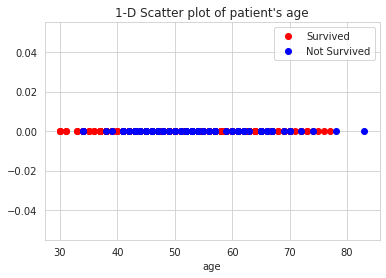

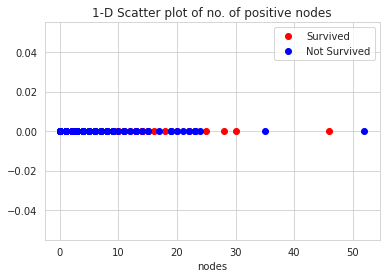

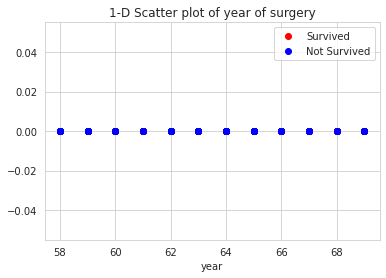

In [ ]:
# Plot 1-D scatter plot for each of the features

plt.figure(1)
plt.plot(survived['patient_age'],np.zeros_like(survived['patient_age']),'ro',label='Survived')
plt.plot(not_survived['patient_age'],np.zeros_like(not_survived['patient_age']),'bo',label='Not Survived')
plt.title('1-D Scatter plot of patient\'s age')
plt.xlabel('age')
plt.legend()

plt.figure(2)
plt.plot(survived['positive_nodes'],np.zeros_like(survived['positive_nodes']),'ro',label='Survived')
plt.plot(not_survived['positive_nodes'],np.zeros_like(not_survived['positive_nodes']),'bo',label='Not Survived')
plt.title('1-D Scatter plot of no. of positive nodes')
plt.xlabel('nodes')
plt.legend()

plt.figure(3)
plt.plot(survived['surgery_year'],np.zeros_like(survived['surgery_year']),'ro',label='Survived')
plt.plot(not_survived['surgery_year'],np.zeros_like(not_survived['surgery_year']),'bo',label='Not Survived')
plt.title('1-D Scatter plot of year of surgery')
plt.xlabel('year')
plt.legend()

Observation(s):
  * By looking at the above plots we are unable to establish any realtionship between patients age and no. of positive nodes and their surviva status

## Probabilty density function and Histograms

<Figure size 432x288 with 0 Axes>

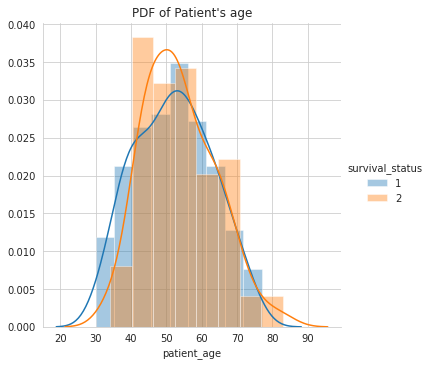

<Figure size 432x288 with 0 Axes>

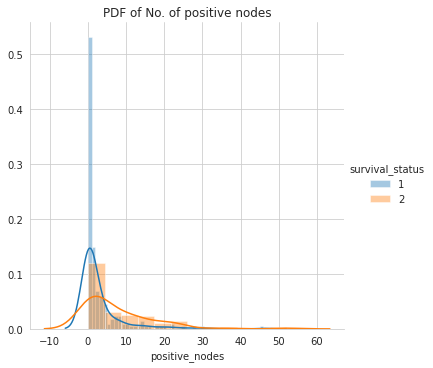

<Figure size 432x288 with 0 Axes>

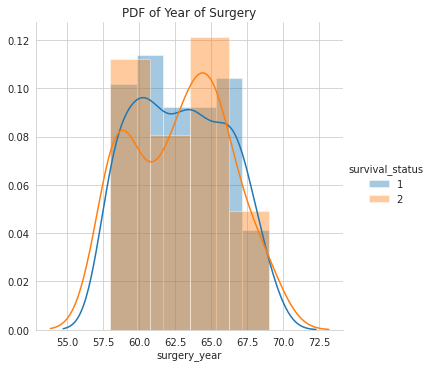

In [ ]:
# survival status based on patient'age using PDF1

plt.figure(1)
sns.FacetGrid(haberman,hue='survival_status',height=5).map(sns.distplot,'patient_age').add_legend()
plt.title('PDF of Patient\'s age')
plt.show()

# survival status based on no. of positive nodes present using PDF

plt.figure(2)
sns.FacetGrid(haberman,hue='survival_status',height=5).map(sns.distplot,'positive_nodes').add_legend()
plt.title('PDF of No. of positive nodes')
plt.show()

# survival status based on year of surgery using PDF1
plt.figure(3)
sns.FacetGrid(haberman,hue='survival_status',height=5).map(sns.distplot,'surgery_year').add_legend()
plt.title('PDF of Year of Surgery')
plt.show()

Observation(s):
  * Even there is signinficant overlap, we can still say that patients between age 20 and 35 have higher chances of survival.
  * Patients with <= 0 nodes have 100% survival chance.
  * The survival chnace subsequently decreases as the no. of positive lympf nodes increases
  * The overlap is huge in case of year of surgery, this feature can not be further used for analysis 

## Cumulative density function(CDF)

bin edges:  [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


Text(0, 0.5, 'year')

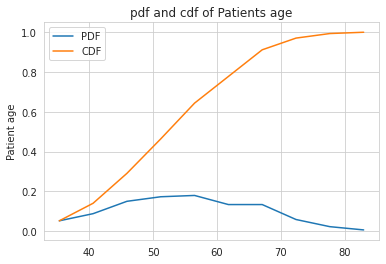

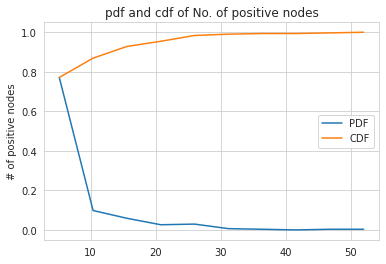

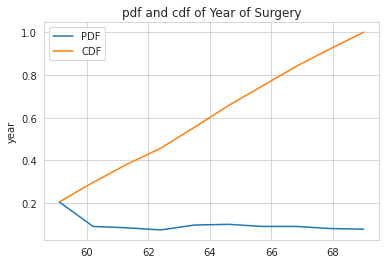

In [ ]:
# plot cdf based on patients age

plt.figure(1)
counts, bin_edges = np.histogram(haberman['patient_age'],bins=10, density=True)
pdf = counts/sum(counts)
print('bin edges: ',bin_edges)
#print('pdf: ',pdf)
cdf = np.cumsum(pdf)
#print('cdf: ',cdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF', 'CDF'])
plt.title('pdf and cdf of Patients age')
plt.ylabel('Patient age')

plt.figure(2)
counts, bin_edges = np.histogram(haberman['positive_nodes'],bins=10, density=True)
pdf = counts/sum(counts)
#print('bin edges: ',bin_edges)
#print('pdf: ',pdf)
cdf = np.cumsum(pdf)
#print('cdf: ',cdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF', 'CDF'])
plt.title('pdf and cdf of No. of positive nodes')
plt.ylabel('# of positive nodes')

plt.figure(3)
counts, bin_edges = np.histogram(haberman['surgery_year'],bins=10, density=True)
pdf = counts/sum(counts)
#print('bin edges: ',bin_edges)
#print('pdf: ',pdf)
cdf = np.cumsum(pdf)
#print('cdf: ',cdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF', 'CDF'])
plt.title('pdf and cdf of Year of Surgery')
plt.ylabel('year')

## Box Plot and Violin Plot

Box Plot

Text(0.5, 1.0, 'Box plot of Survival status based on year of surgery')

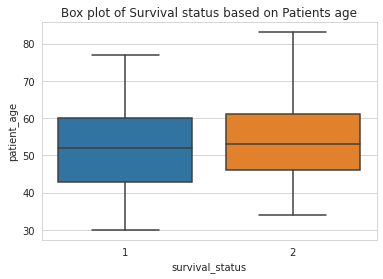

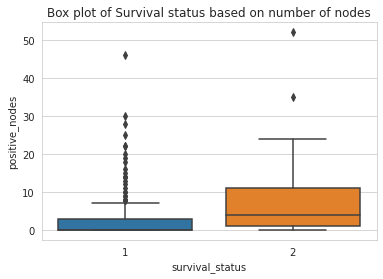

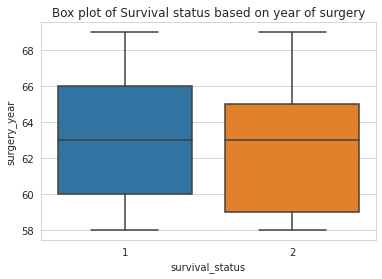

In [ ]:
# Box plot for patient age, # of nodes and yearof surgery

plt.figure(1)
sns.boxplot(x='survival_status',y='patient_age',data=haberman)
plt.title('Box plot of Survival status based on Patients age')

plt.figure(2)
sns.boxplot(x='survival_status',y='positive_nodes',data=haberman)
plt.title('Box plot of Survival status based on number of nodes')

plt.figure(3)
sns.boxplot(x='survival_status',y='surgery_year',data=haberman)
plt.title('Box plot of Survival status based on year of surgery')

Observation(s):
  * Plotting survival stauts based on patient age and year of surgery is not helpful as, median, 25% and 75% for both of them are almost same 
  * Patient having less than 5 modes have 100% chnace of survival
  * Having less positive nodes is a dominant feature in determining patrients age
  * There also seems to be lot of outliers in positive nodes 

**Violn Plot**

Text(0.5, 1.0, 'Box plot of Survival status based on year of surgery')

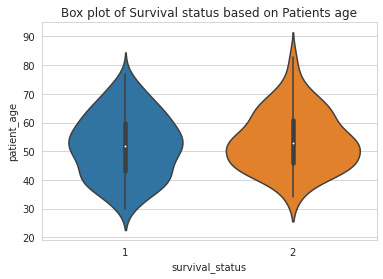

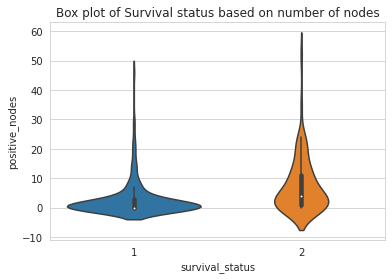

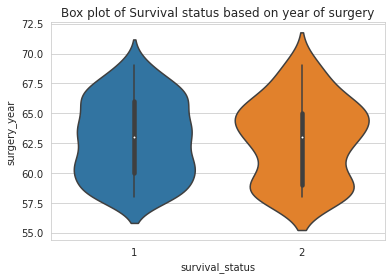

In [ ]:
# Viloin plot for patient age, # of nodes and yearof surgery

plt.figure(1)
sns.violinplot(x='survival_status',y='patient_age',data=haberman)
plt.title('Box plot of Survival status based on Patients age')

plt.figure(2)
sns.violinplot(x='survival_status',y='positive_nodes',data=haberman)
plt.title('Box plot of Survival status based on number of nodes')

plt.figure(3)
sns.violinplot(x='survival_status',y='surgery_year',data=haberman)
plt.title('Box plot of Survival status based on year of surgery')

in figure 2, the plot is centered around 0 to 4, which means lesser the nodes higher the chances of survival.
Figure 1 shows that patients age follows normal distribution.
Figure 3 has subsequent overlap, hence can't be used

# Bivariate Analysis

2-D Scatter Plot

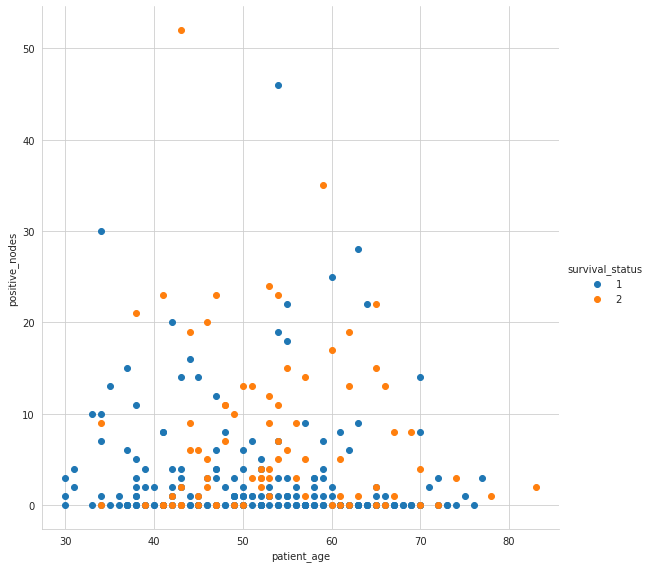

In [ ]:
# relationship between patients age and # of nodes

sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='survival_status',height=8).map(plt.scatter,'patient_age','positive_nodes').add_legend()

Observation(s):<br>
Patients below 35 years of age and less than 10 nodes have maximum chances of survival<br>
Patient with more than 50 nodes doesn't survives<br>
Patient above age 75 has no chance of survival despite having positive nodes less than 5<br>
The classes can not be easily separated using 2d scatter plot


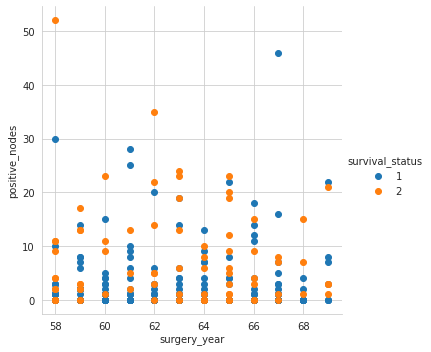

In [ ]:
# relationship between year of surgery and # of nodes

sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='survival_status',height=5).map(plt.scatter,'surgery_year','positive_nodes').add_legend()

The above plot is not linearly separable

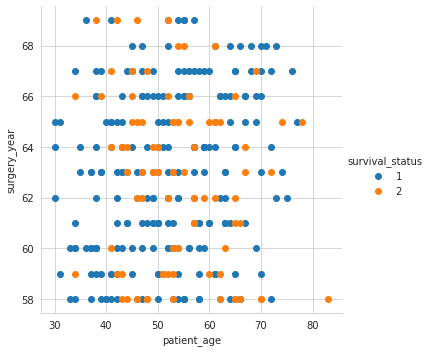

In [ ]:
# relationship between patients age and year of surgery

sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue='survival_status',height=5).map(plt.scatter,'patient_age','surgery_year').add_legend()

The above plot is not linearly separable


**Pair Plot**

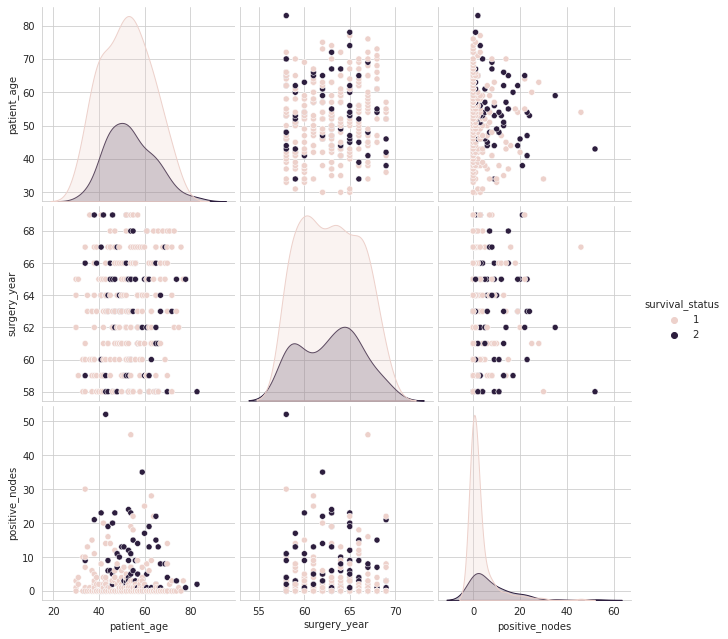

In [ ]:
sns.pairplot(haberman,hue='survival_status',height=3)

The pair plot between year of surgery and no. of nodes as well as between year of surgery is not useful<br>

DEspite using pairplot, we are unable to access much about the datapoints

# Multivariate Analysis

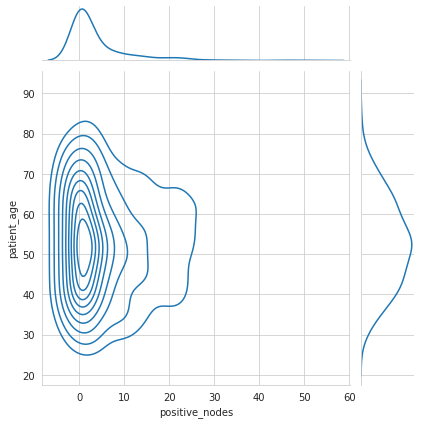

In [ ]:
#Contour Plot

sns.jointplot(x="positive_nodes",y="patient_age",data=haberman, kind="kde")
plt.show()

Depicts the same that lesser the nodes, higher the chances of survival

# Observation(s)



*   The higher the no. of nodes lesser the chances of survival irrespective of other features
*   Patients age and number of posituve nodes are the best features to predict survival status, where as year of surgery doesn'y have any impact on survival status of patient
*   Although patients who are guaranteed to survive have 0 positive nodes, this is not always the case as there're still a small percentage of patients who died within 5 years of surgery even though they had 0 positive nodes.
*   As the dataset is imbalanced and there's a lot of overlapping between different features, higher level of analysis is required to come to a concrete conclusion and build a model that predicts accurate survival rates.

